<a href="https://colab.research.google.com/github/SrinithiSrinivasan/Data-Analytics/blob/master/Regressin-Linear%26Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kc_house_data.csv to kc_house_data.csv
User uploaded file "kc_house_data.csv" with length 2515206 bytes


In [5]:
import pandas as pd
df = pd.read_csv('headbrain.csv')
df 



,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [0]:
height = df['Head Size(cm^3)']
weight = df['Brain Weight(grams)']


In [8]:
#computing with formulae
import numpy as np
h_mean = np.mean(height)
w_mean = np.mean(weight)
length = len(height)

numer = 0
denom = 0
for i in range(length):
  numer += (height[i]-h_mean) * (weight[i]-w_mean)
  denom += (height[i]-h_mean) **2 
b1 = numer/denom
b0 = w_mean - (b1*h_mean)

print(b1,b0)

0.26342933948939945 325.57342104944223


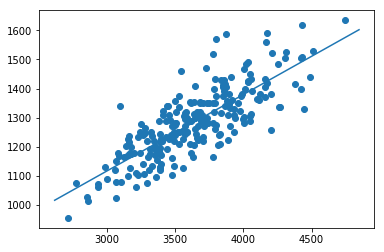

In [11]:
#visualizing
import matplotlib.pyplot as plt

plt.scatter(height,weight)

max_x = np.max(height)+100
min_x = np.min(height)-100

x = np.linspace(min_x,max_x,1000)
y = b0+b1*x

plt.plot(x,y)


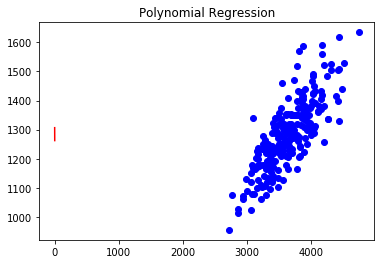

In [25]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
x = df.iloc[:, 1:2].values 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x)
  
poly.fit(X_poly, weight) 
lin2 = LinearRegression() 
lin2.fit(X_poly, weight) 

plt.scatter(height, weight, color = 'blue') 
  
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
  
plt.show() 